In [256]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [257]:
score = pd.read_csv('train.csv')
score = pd.DataFrame(score)

<AxesSubplot:>

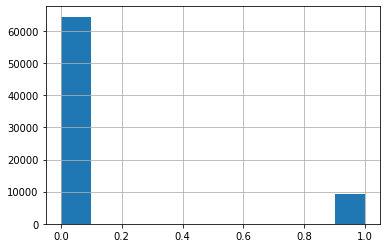

In [258]:
# Изучим количество клиентов допустивших дефолт
score.default.hist()

<AxesSubplot:>

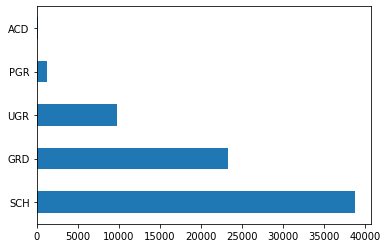

In [259]:
score.education.value_counts().plot.barh()

In [260]:
# Заполним пропуски на медианные значения
mod = score.education.mode()[0]
score['education'] = score['education'].fillna(value=mod, axis=0)

In [261]:
score.head(2)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0


In [262]:
# разделяем данные на обучающий и валидационный наборы данных
train, validation = train_test_split(score, test_size=0.33, random_state=42)

Построим графики распределения логарифмированных переменных.

C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


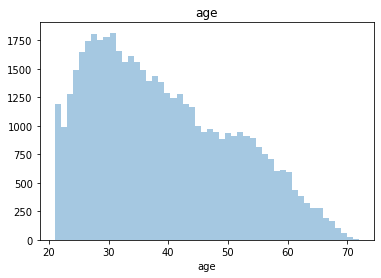

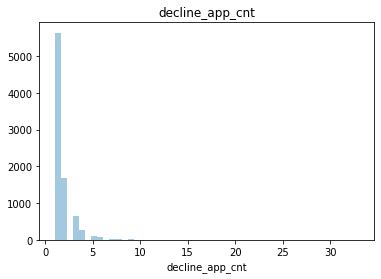

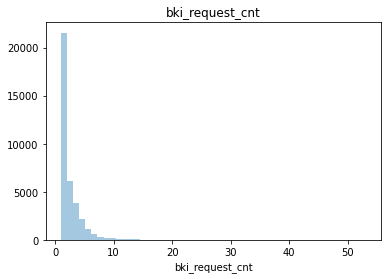

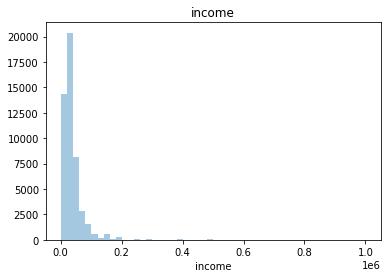

In [263]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

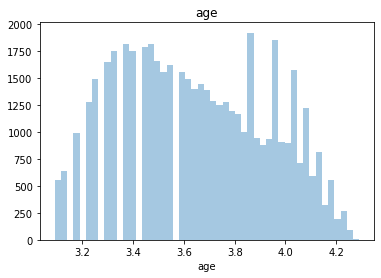

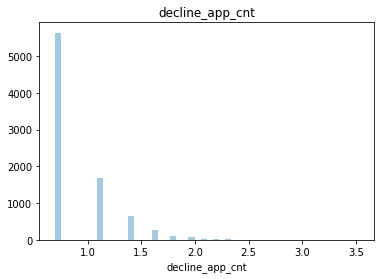

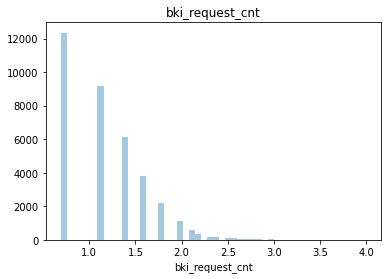

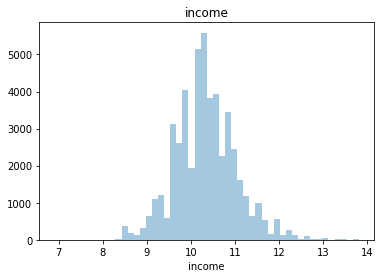

In [264]:
for i in num_cols:
    train[i] = train[i].apply(lambda w: np.log(w+1))
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [265]:
num_cols

['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

<AxesSubplot:title={'center':'income'}, xlabel='[default]'>

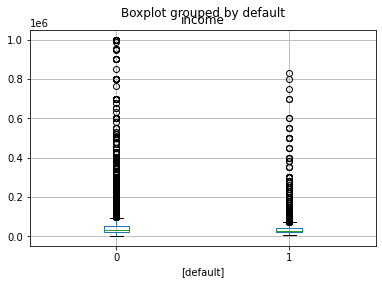

In [266]:
score.boxplot(column=['income'], by=['default'])

<AxesSubplot:>

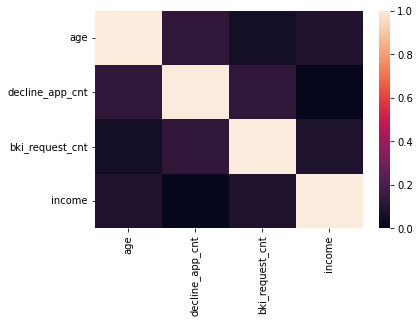

In [267]:
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

<AxesSubplot:>

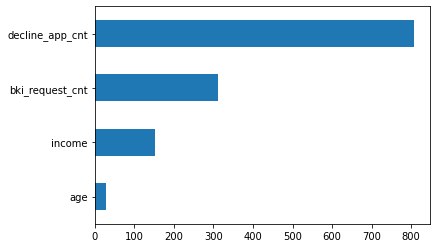

In [268]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [269]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [270]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
8931,104346,GRD,0,3.332205,0,0,0.0,0,1.386294,2,3,10.308986,0,0
63915,56248,GRD,0,3.871201,0,0,0.0,0,1.609438,1,2,9.903538,0,0
45568,59433,SCH,0,3.871201,0,0,0.0,0,0.000000,2,3,10.714440,0,0
3391,21096,SCH,0,3.496508,0,0,0.0,0,1.386294,2,3,9.952325,0,1
40660,18878,SCH,0,3.465736,0,0,0.0,1,1.945910,2,3,10.308986,1,0


In [271]:
#бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

In [272]:
train['education'] = label_encoder.fit_transform(train['education'])

<AxesSubplot:>

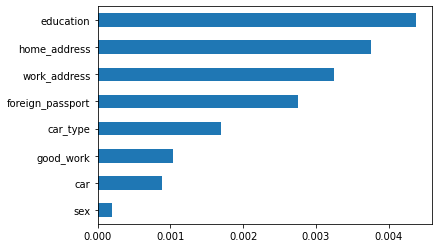

In [273]:
imp_cat = pd.Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [274]:
X_cat = OneHotEncoder(sparse=False).fit_transform(train[cat_cols].values)

In [275]:
X_num = StandardScaler().fit_transform(train[num_cols].values)

In [276]:
X_train = np.hstack([X_num, train[bin_cols].values, X_cat])
y_train = train['default'].values

Готовим Validation

#### ЗАДАНИЕ

Проделайте все те же манипуляции с данными на наборе данных validation, которые мы специально отделили в самом начале при знакомстве с данными.
После преобразования отделите целевую переменную default в validation-наборе данных. Это будут ваши ответы, запишите их в переменную y_true, оставшаяся часть будет храниться в X_validation.
Обучите модель на валидационном наборе данных на стандартных настройках логистической регрессии.
Используйте обученную модель для предсказания дефолта в validation-выборке. Запишите предсказанные значения в переменную y_pred = model.predict_proba(X_validation).

C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


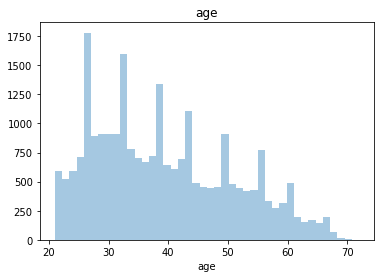

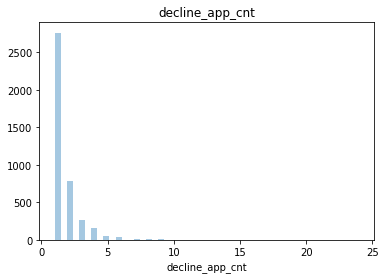

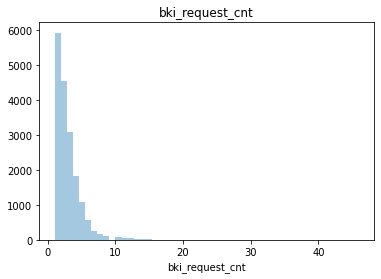

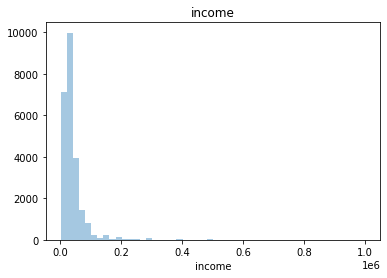

In [277]:
for i in num_cols:
    plt.figure()
    sns.distplot(validation[i][validation[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

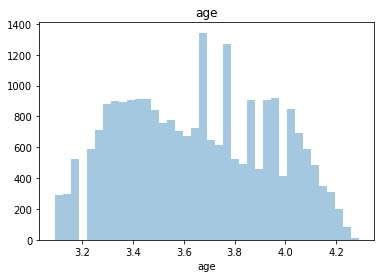

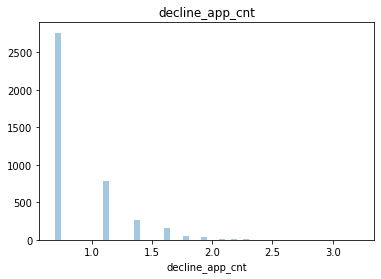

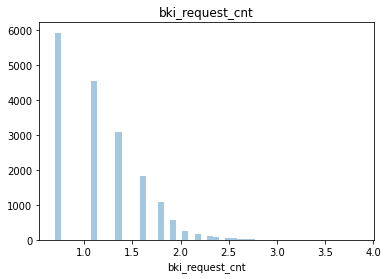

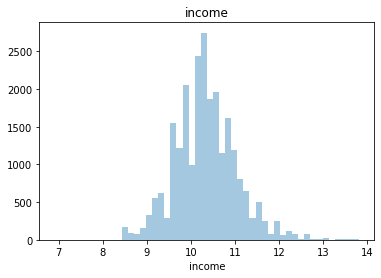

In [278]:
for i in num_cols:
    validation[i] = validation[i].apply(lambda w: np.log(w+1))
for i in num_cols:
    plt.figure()
    sns.distplot(validation[i][validation[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

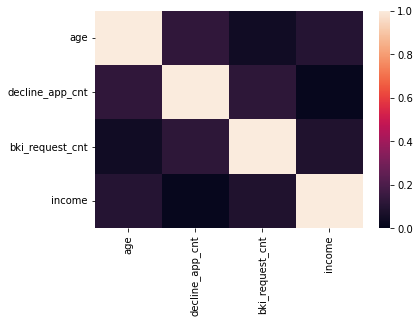

In [279]:
sns.heatmap(validation[num_cols].corr().abs(), vmin=0, vmax=1)

In [280]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(validation['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [281]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    validation[column] = label_encoder.fit_transform(validation[column])
    
# убедимся в преобразовании    
validation.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
68068,66799,UGR,0,3.401197,0,0,0.693147,0,1.386294,1,2,10.043293,0,0
60795,25379,SCH,1,4.077537,0,0,0.000000,0,1.098612,1,2,9.615872,0,0
5365,28825,GRD,0,4.248495,0,0,0.000000,0,0.000000,2,3,10.064798,0,1
27565,37530,UGR,1,3.332205,1,1,0.000000,0,0.000000,2,3,11.082158,0,0
72235,4264,GRD,0,3.496508,0,0,0.693147,0,1.945910,2,3,10.126671,0,1


In [282]:
validation['education'] = label_encoder.fit_transform(validation['education'])

<AxesSubplot:>

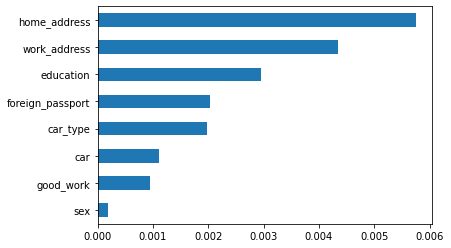

In [283]:
imp_cat = pd.Series(mutual_info_classif(validation[bin_cols + cat_cols], validation['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [284]:
X_cat_v = OneHotEncoder(sparse=False).fit_transform(validation[cat_cols].values)

In [285]:
X_num_v = StandardScaler().fit_transform(validation[num_cols].values)

In [286]:
X_validation = np.hstack([X_num_v, validation[bin_cols].values, X_cat_v])
y_true = validation['default'].values

In [287]:
log_reg = LogisticRegression()

In [288]:
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_validation)

C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [289]:
from sklearn.metrics import confusion_matrix

In [290]:
confusion_matrix(y_true, y_pred)

array([[21284,    10],
       [ 3046,    14]], dtype=int64)

In [291]:
from sklearn.metrics import classification_report

In [292]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     21294
           1       0.58      0.00      0.01      3060

    accuracy                           0.87     24354
   macro avg       0.73      0.50      0.47     24354
weighted avg       0.84      0.87      0.82     24354



In [293]:
from sklearn.metrics import roc_auc_score, roc_curve

In [294]:
tp = 21284
fp = 10
fn = 3046
tn = 14

In [295]:
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)

In [299]:
tpr, fpr, threshold = roc_curve(y_true, y_pred)

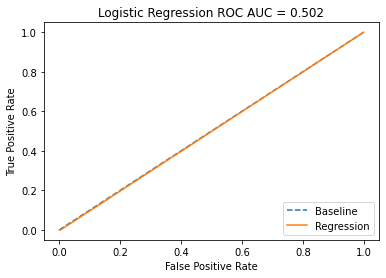

In [300]:
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zicde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages

	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'auto'
	n_jobs: None
	penalty: 'l1'
	random_state: None
	solver: 'liblinear'
	tol: 0.001
	verbose: 0
	warm_start: False
